In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout



In [2]:
dataset_path = "/kaggle/input/train/train/"

def load_dataset(dataset_path):
    """
    Loads the Dogs/Cats dataset
    
    Arguments: 
    dataset_path -- String with the dataset path

    Return:
    images -- list of images as numpy arrays
    labels -- list of labels as integers 0 dogs / 1 cats
    """
    images = []
    labels = []
    img_height = 32
    img_width = 32
    dataset_filenames = listdir(dataset_path)

    # Sanity check
    #assert len(dataset_filenames) == 25000
    print(len(dataset_filenames), " samples.")
    for img_name in dataset_filenames:
        # Extract the labels
        if img_name.startswith('cat'):
            which_class = 1
        else:
            which_class = 0
        # load image as a 64 x 64 * 3 pixels thus it only requires 1.2 gb of ram
        image = load_img(dataset_path + img_name, target_size=(img_height, img_width))
        image = img_to_array(image)
        images.append(image)
        labels.append(which_class)
    images = np.asarray(images)
    labels = np.asarray(labels)
    return images, labels


In [8]:
def model():
    """
    Simple feedforward ann
    
    Arguments: 


    Return:
    classifier -- Keras Sequential object representing the model
    """
    # Initializing the ANN
    classifier = Sequential()
    # Adding the Input and the first hidden layer
    classifier.add(Dense(output_dim=768, init='glorot_uniform', activation='relu', input_dim=3072))
    
    # adding more hidden layers
    classifier.add(Dense(output_dim=384, init='glorot_uniform', activation='relu'))

    # adding the output layer
    classifier.add(Dense(output_dim=1, init='glorot_uniform', activation='sigmoid'))

    # Compiling the ann
    classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

    return classifier

In [11]:
# Load the images and split the dataset into 75% for trainning and 25% for testing
images, labels = load_dataset(dataset_path)
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.25, random_state = 0)
# Flatten the trainning and the test set
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Standardize the dataset
X_train_normalized = X_train_flatten/255.
X_test_normalized = X_test_flatten/255.

classifier = model()
classifier.fit(X_train_normalized, Y_train, batch_size=128, epochs=250)

25000  samples.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=3072, units=768, kernel_initializer="glorot_uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=384, kernel_initializer="glorot_uniform")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`


Epoch 1/250
18750/18750 [==============================] - 1s 59us/step - loss: 0.7562 - acc: 0.5421
Epoch 2/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.6660 - acc: 0.5965
Epoch 3/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.6509 - acc: 0.6163
Epoch 4/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.6491 - acc: 0.6167
Epoch 5/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.6387 - acc: 0.6306
Epoch 6/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.6326 - acc: 0.6386
Epoch 7/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.6293 - acc: 0.6439
Epoch 8/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.6225 - acc: 0.6547
Epoch 9/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.6269 - acc: 0.6418
Epoch 10/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.6069 - a

18750/18750 [==============================] - 1s 32us/step - loss: 0.2434 - acc: 0.8930
Epoch 82/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.2494 - acc: 0.8886
Epoch 83/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.2276 - acc: 0.9016
Epoch 84/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.2553 - acc: 0.8890
Epoch 85/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.2645 - acc: 0.8870
Epoch 86/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.2351 - acc: 0.8987
Epoch 87/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.2523 - acc: 0.8902
Epoch 88/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.2441 - acc: 0.8948
Epoch 89/250
18750/18750 [==============================] - 1s 34us/step - loss: 0.2443 - acc: 0.8957
Epoch 90/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.2252 - acc: 

18750/18750 [==============================] - 1s 33us/step - loss: 0.0582 - acc: 0.9820
Epoch 161/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.0705 - acc: 0.9758
Epoch 162/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.0528 - acc: 0.9836
Epoch 163/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.0827 - acc: 0.9696
Epoch 164/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.0567 - acc: 0.9802
Epoch 165/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.1117 - acc: 0.9565
Epoch 166/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.1049 - acc: 0.9596
Epoch 167/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.0963 - acc: 0.9630
Epoch 168/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.1672 - acc: 0.9385
Epoch 169/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.107

18750/18750 [==============================] - 1s 33us/step - loss: 0.0128 - acc: 0.9982
Epoch 240/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.0128 - acc: 0.9980
Epoch 241/250
18750/18750 [==============================] - 1s 34us/step - loss: 0.0280 - acc: 0.9910
Epoch 242/250
18750/18750 [==============================] - 1s 34us/step - loss: 0.1252 - acc: 0.9572
Epoch 243/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.1168 - acc: 0.9582
Epoch 244/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.0228 - acc: 0.9949
Epoch 245/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.0130 - acc: 0.9981
Epoch 246/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.0097 - acc: 0.9990
Epoch 247/250
18750/18750 [==============================] - 1s 33us/step - loss: 0.0096 - acc: 0.9990
Epoch 248/250
18750/18750 [==============================] - 1s 32us/step - loss: 0.141

Text(0, 0.5, 'MSE Score')

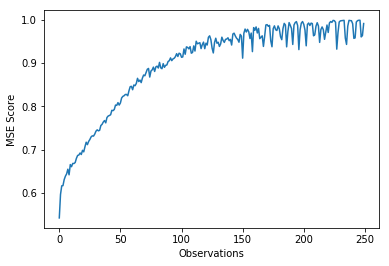

In [12]:
y_pred = classifier.predict(X_test_normalized)
y_pred = (y_pred > 0.5)
y_pre = y_pred.astype(int)
mse = ((Y_test - y_pred)**2).mean(axis=0)

plt.subplot(1,1,1)
plt.plot(classifier.history.history['acc'], label='Accuracy')
plt.xlabel('Observations')
plt.ylabel('MSE Score')

Text(0, 0.5, 'Accuracy')

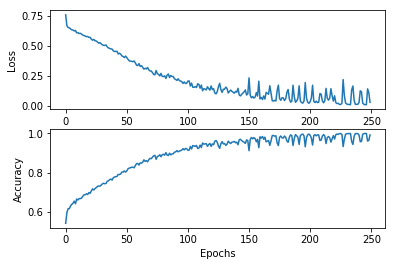

In [13]:
# Plotting the graphs due to loss and accuracy
plt.subplot(2,1,1)
plt.plot(classifier.history.history['loss'], label='Trainning loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,1,2)
plt.plot(classifier.history.history['acc'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [14]:
# Now we load the images from test1's directory
dataset_path = '/kaggle/input/test1/test1/'
images_test, _ = load_dataset(dataset_path)

# Flatten and normalize the images
images_test_flatten = images_test.reshape(images_test.shape[0], -1)
images_test_normalized = images_test_flatten/255.0

ids = []
labels = []
# Extract the id. Kinda redundant part
dataset_filenames = listdir(dataset_path)
for image_name in dataset_filenames:
    ids.append((image_name.split('.'))[0])

Y_test_pred = classifier.predict(images_test_normalized)
Y_test_pred = (Y_test_pred > 0.5)

dataframe_submission = pd.DataFrame()
dataframe_submission['id'] = ids
dataframe_submission['label'] = Y_test_pred.astype(int)
dataframe_submission.to_csv('submission.csv', index=False)

12500  samples.
